# The contents of this Notebook are almost identical to the previous one. only difference is setting up the postgreSQL as follows:

1- Install psycopg2-binary.
2- using the pgAdmin4. logged in to the server, created my DB (lefastapi), created my user (leuser), sat the password and the privilages, granted the wizard. 
3- updated the url

In [2]:
!pip install fastapi uvicorn sqlalchemy psycopg2-binary nest_asyncio

# Security cuz....yes

at first when i tried it. i was using the password and stuff in the DB url, but that seemed overkill and a bit risky. so after consulting with Mr.Wajid he suggested using a .env file. and that is what i did. great idea ngl.

In [18]:
!pip install python-dotenv

In [ ]:
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path = "env.env")

DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_NAME = os.getenv("DB_NAME")
DB_HOST = os.getenv("DB_HOST", "localhost")
DB_PORT = os.getenv("DB_PORT", "5432")

DATABASE_URL = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"     

In [45]:
from sqlalchemy import create_engine, Column, Integer, String
from sqlalchemy.orm import declarative_base, sessionmaker
from fastapi import FastAPI, Depends, HTTPException
from sqlalchemy.orm import Session
import nest_asyncio
import uvicorn
import threading

In [46]:
engine = create_engine(DATABASE_URL)
SessionLocal = sessionmaker(bind=engine, autoflush=False, autocommit=False)
Base = declarative_base()

class User(Base):
    __tablename__ = "users"
    id = Column(Integer, primary_key=True, index=True)
    name = Column(String, nullable=False)

Base.metadata.create_all(bind=engine)

Task exception was never retrieved
future: <Task finished name='Task-50' coro=<Server.serve() done, defined at C:\Users\User\anaconda33\Lib\site-packages\uvicorn\server.py:69> exception=SystemExit(1)>
Traceback (most recent call last):
  File "C:\Users\User\anaconda33\Lib\site-packages\uvicorn\server.py", line 164, in startup
    server = await loop.create_server(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda33\Lib\asyncio\base_events.py", line 1525, in create_server
    raise OSError(err.errno, 'error while attempting '
OSError: [Errno 10048] error while attempting to bind on address ('127.0.0.1', 8000): only one usage of each socket address (protocol/network address/port) is normally permitted

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\User\anaconda33\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "C:\Users\User\anaconda33\Lib\threading.py", line 975, in run

In [47]:
app = FastAPI()

def get_db():
    db = SessionLocal()
    try:
        yield db
    finally:
        db.close()

In [48]:
@app.get("/")
def root():
    return {"message": "Welcome to the FastAPI PostgreSQL CRUD app! Visit /docs to test."}

@app.post("/users/")
def create_user(name: str, db: Session = Depends(get_db)):
    user = User(name=name)
    db.add(user)
    db.commit()
    db.refresh(user)
    return {"message": f"Hello, {user.name}! Your name is stored.", "id": user.id}

@app.get("/users/")
def get_all_users(db: Session = Depends(get_db)):
    return db.query(User).all()

@app.get("/users/{user_id}")
def get_user(user_id: int, db: Session = Depends(get_db)):
    user = db.query(User).get(user_id)
    if not user:
        raise HTTPException(status_code=404, detail="User not found")
    return user

@app.put("/users/{user_id}")
def update_user(user_id: int, name: str, db: Session = Depends(get_db)):
    user = db.query(User).get(user_id)
    if not user:
        raise HTTPException(status_code=404, detail="User not found")
    user.name = name
    db.commit()
    return {"message": f"User {user.id} updated to {user.name}"}

@app.delete("/users/{user_id}")
def delete_user(user_id: int, db: Session = Depends(get_db)):
    user = db.query(User).get(user_id)
    if not user:
        raise HTTPException(status_code=404, detail="User not found")
    db.delete(user)
    db.commit()
    return {"message": f"User {user.id} deleted"}

In [49]:
nest_asyncio.apply()

def run():
    uvicorn.run(app, host="127.0.0.1", port=8000)

thread = threading.Thread(target=run, daemon=True)
thread.start()

print("FastAPI is running at http://127.0.0.1:8000/docs")

FastAPI is running at http://127.0.0.1:8000/docs


INFO:     Started server process [25420]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
ERROR:    [Errno 10048] error while attempting to bind on address ('127.0.0.1', 8000): only one usage of each socket address (protocol/network address/port) is normally permitted
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.


INFO:     127.0.0.1:12942 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:12942 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:12943 - "POST /users/?name=Dio%20brando HTTP/1.1" 200 OK


Task exception was never retrieved
future: <Task finished name='Task-58' coro=<Server.serve() done, defined at C:\Users\User\anaconda33\Lib\site-packages\uvicorn\server.py:69> exception=SystemExit(1)>
Traceback (most recent call last):
  File "C:\Users\User\anaconda33\Lib\site-packages\uvicorn\server.py", line 164, in startup
    server = await loop.create_server(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda33\Lib\asyncio\base_events.py", line 1525, in create_server
    raise OSError(err.errno, 'error while attempting '
OSError: [Errno 10048] error while attempting to bind on address ('127.0.0.1', 8000): only one usage of each socket address (protocol/network address/port) is normally permitted

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\User\anaconda33\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "C:\Users\User\anaconda33\Lib\threading.py", line 975, in run

INFO:     127.0.0.1:12972 - "GET /users/1 HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:12973 - "GET /users/3 HTTP/1.1" 200 OK
INFO:     127.0.0.1:12976 - "PUT /users/2?name=Jack HTTP/1.1" 200 OK
INFO:     127.0.0.1:12988 - "DELETE /users/3 HTTP/1.1" 200 OK


# Examples from the page 

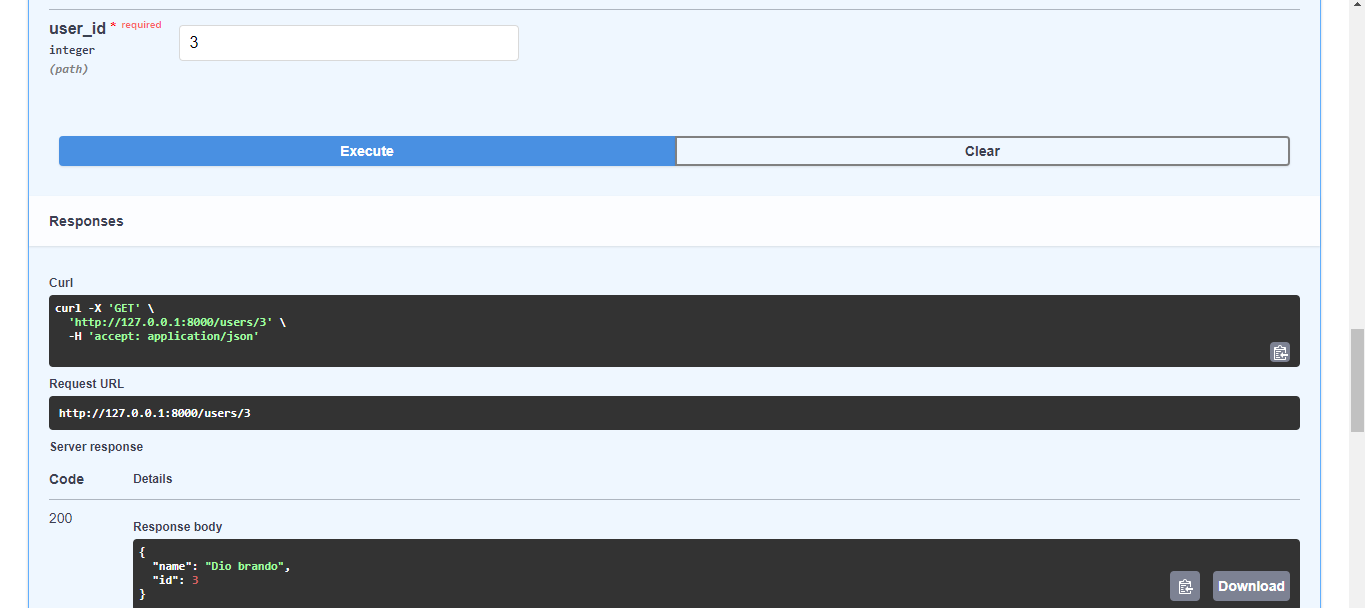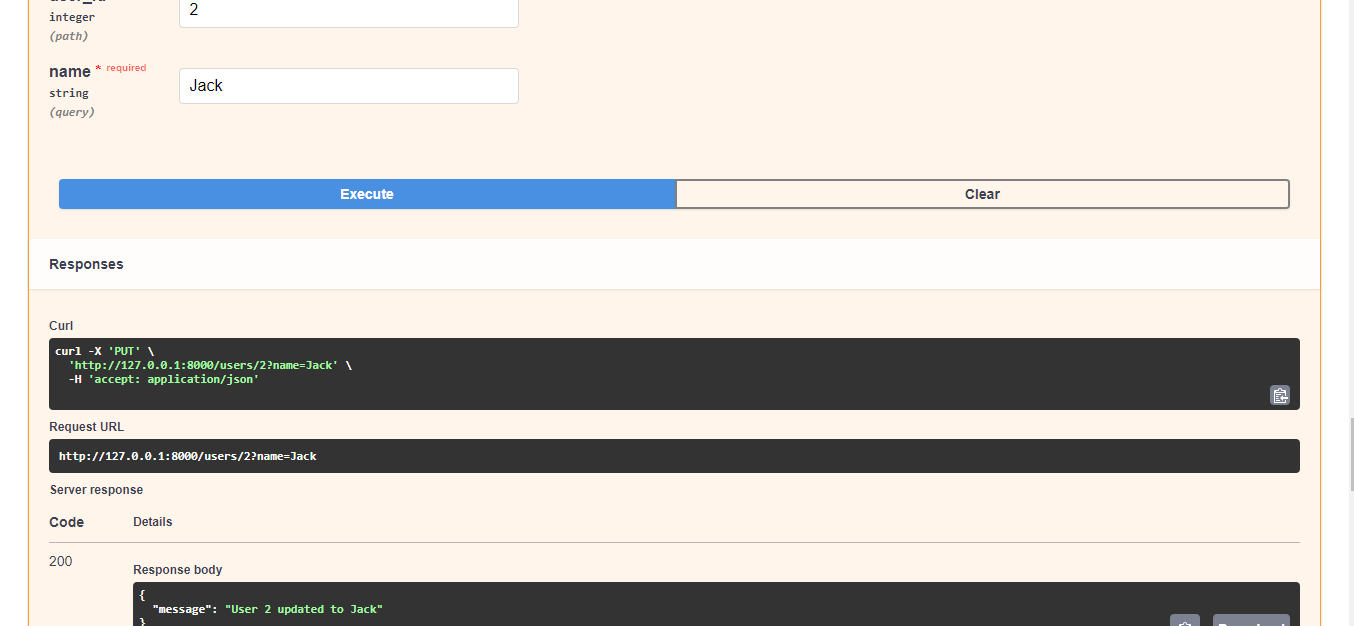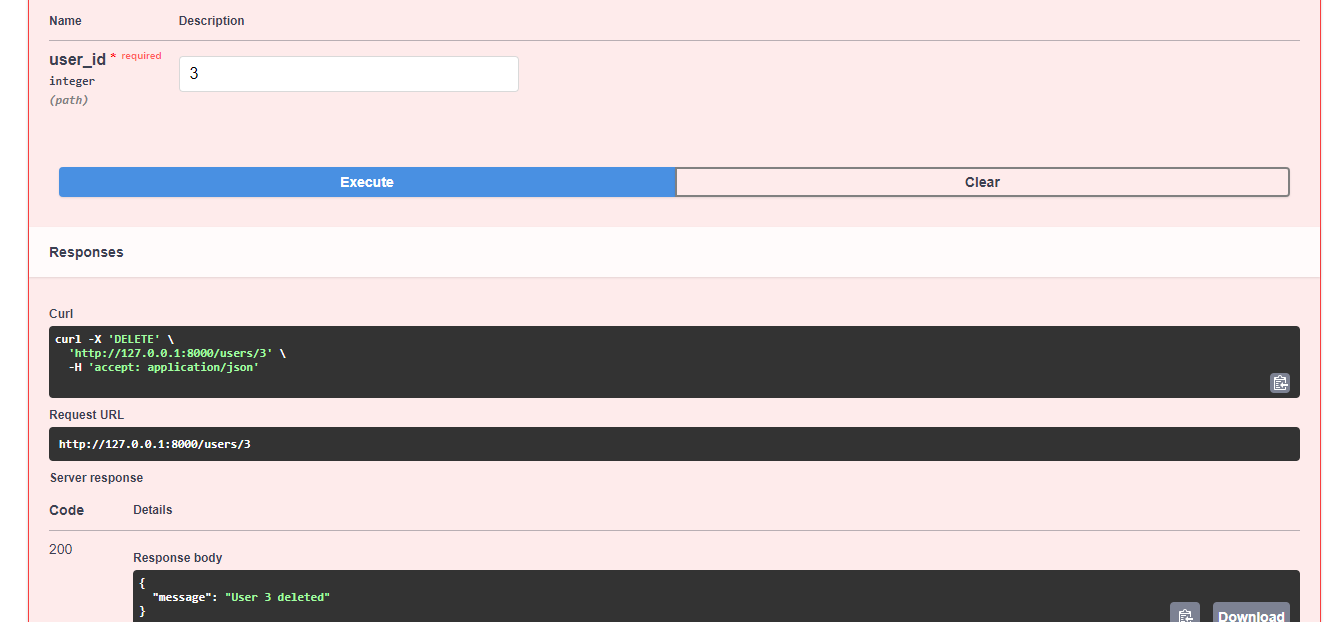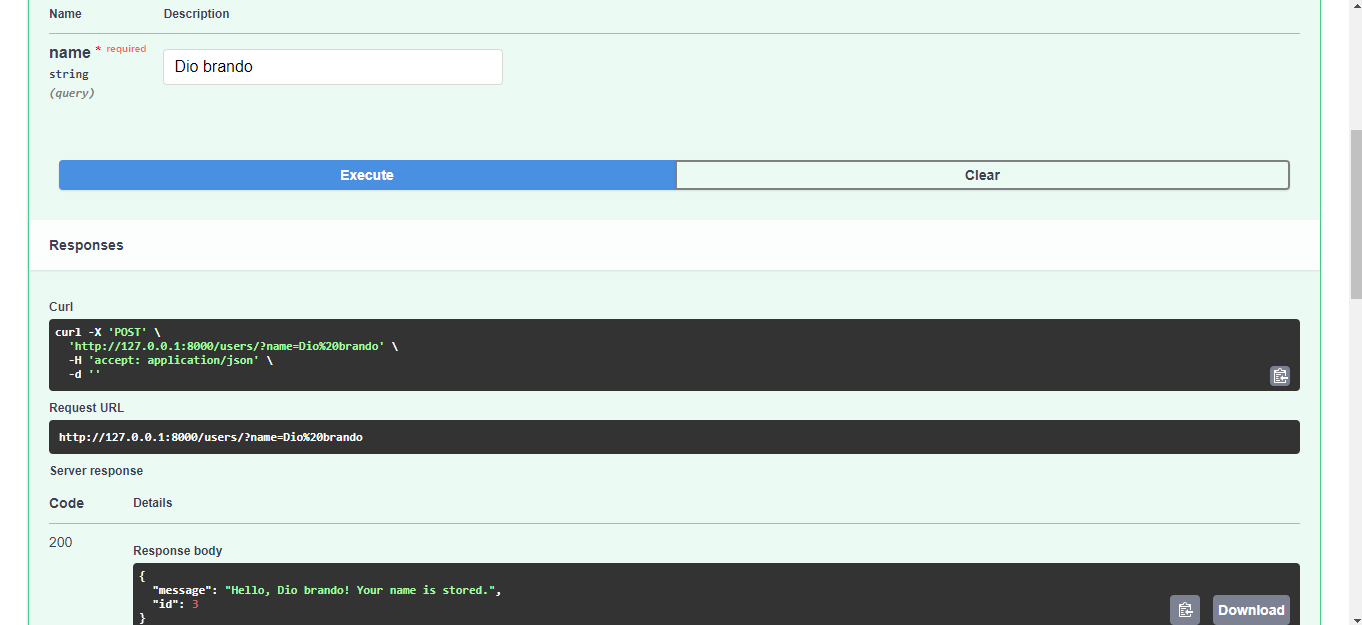